# Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
6. Сравните метрики качества исходной и оптимальной моделей.

# 1. Подготовка данных

In [51]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from typing import Dict, Tuple
import math
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [151]:
# Будем анализировать данные только на обучающей выборке
df = pd.read_csv('/Users/evgeniayurova/Desktop/ML/House Price India.csv')

In [152]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [153]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [154]:
draw_missing(df).round(1)

,Total,Percent
id,0,0.0
Area of the basement,0,0.0
Distance from the airport,0,0.0
Number of schools nearby,0,0.0
lot_area_renov,0,0.0
living_area_renov,0,0.0
Longitude,0,0.0
Lattitude,0,0.0
Postal Code,0,0.0
Renovation Year,0,0.0


In [9]:
df=df.dropna()

In [10]:
draw_missing(df).round(1)

,Total,Percent
id,0,0.0
huml,0,0.0
humw,0,0.0
ulnal,0,0.0
ulnaw,0,0.0
feml,0,0.0
femw,0,0.0
tibl,0,0.0
tibw,0,0.0
tarl,0,0.0


In [11]:
df.shape

(413, 12)

# Кодирование категориальных данных


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [20]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

/var/folders/qd/8dmk5qvx6876bry7gnjq81xw0000gn/T/ipykernel_42322/1012653078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = le.fit_transform(df['type'])


In [21]:
le.classes_

array(['P', 'R', 'SO', 'SW', 'T', 'W'], dtype=object)

In [22]:
cat_enc_le

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [23]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

## Разделение данных

Разделим данные на столбец с целевым признаком и данные с другими столбцами:

In [29]:
X = df.drop("type", axis=1)
Y = df["type"]

In [32]:
print(X.head(), "\n")
print(Y.head())

   id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13 

0    3
1    3
2    3
3    3
4    3
Name: type, dtype: int64


In [34]:
print(X.shape)
print(Y.shape)

(413, 11)
(413,)


## Разделение выборки на обучающую и тестовую

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=1)

размеры обучающей выборки

In [40]:
X_train.shape, y_train.shape

((309, 11), (309,))

размеры тестовой выборки

In [43]:
X_test.shape, y_test.shape

((104, 11), (104,))

In [52]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [56]:
print_class_proportions(y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 28 	 	 9.06%
1 	 34 	 	 11.0%
2 	 91 	 	 29.45%
3 	 87 	 	 28.16%
4 	 15 	 	 4.85%
5 	 54 	 	 17.48%


In [57]:
print_class_proportions(y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 10 	 	 9.62%
1 	 14 	 	 13.46%
2 	 33 	 	 31.73%
3 	 29 	 	 27.88%
4 	 8 	 	 7.69%
5 	 10 	 	 9.62%


## Обучение модели с произвольным гиперпараметром

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
clf_i = KNeighborsClassifier(n_neighbors=10)
clf_i.fit(X_train, y_train)
target_i = clf_i.predict(X_test)
len(target_i), target_i


/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(104,
 array([1, 3, 3, 2, 4, 1, 1, 2, 5, 1, 0, 4, 1, 5, 2, 4, 2, 5, 1, 3, 2, 2,
        3, 3, 3, 3, 5, 0, 2, 2, 3, 3, 5, 3, 2, 3, 3, 3, 4, 3, 2, 3, 1, 2,
        2, 5, 3, 2, 2, 4, 0, 2, 2, 2, 2, 3, 2, 0, 2, 0, 3, 1, 1, 4, 1, 3,
        3, 1, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 5, 2, 0, 3, 3, 5, 0, 2, 3,
        0, 0, 2, 5, 3, 2, 3, 3, 3, 1, 1, 3, 0, 5, 2, 2]))

### Проверка качества

In [69]:
accuracy_score(y_test, target_i)

0.9711538461538461

In [70]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [71]:
print_accuracy_score_for_classes(y_test, target_i)

Метка 	 Accuracy
0 	 1.0
1 	 0.9285714285714286
2 	 1.0
3 	 1.0
4 	 0.75
5 	 1.0


##  Кросс-валидация

In [72]:
from sklearn.model_selection import cross_val_score, cross_validate

In [74]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         df, df.type, cv=3)
scores

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

array([0.74637681, 1.        , 0.77372263])

In [77]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        df, df.type, scoring='f1_weighted', 
                        cv=3, return_train_score=True)
scores

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

{'fit_time': array([0.00302482, 0.00175214, 0.00168204]),
 'score_time': array([0.02887917, 0.01340103, 0.00827694]),
 'test_score': array([0.75642843, 1.        , 0.78087539]),
 'train_score': array([0.99632891, 0.99257773, 1.        ])}

### Стратегия K-Fold

In [78]:
from sklearn.model_selection import KFold

In [81]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         df, df.type, scoring='f1_weighted', 
                         cv=kf)
scores

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

{'fit_time': array([0.02250409, 0.00307393, 0.00320935, 0.00794077, 0.00226498]),
 'score_time': array([0.01750708, 0.01406193, 0.00542569, 0.00605226, 0.00897312]),
 'test_score': array([0.9625    , 0.81544922, 0.17164186, 0.50232288, 1.        ])}

### Стратегия Repeated K-Fold

In [83]:
from sklearn.model_selection import RepeatedKFold

In [86]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         df, df.type, scoring='f1_weighted', 
                         cv=kf)
scores

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

{'fit_time': array([0.00346899, 0.00254393, 0.00672007, 0.00177169, 0.0021019 ,
        0.00366712]),
 'score_time': array([0.01538992, 0.0101769 , 0.01073003, 0.0126431 , 0.01213598,
        0.00862074]),
 'test_score': array([0.97062351, 0.97050089, 0.97705165, 0.95711473, 0.9131922 ,
        0.97143223])}

### Оптимизация гиперпараметров 

###   Через GridSearch

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [89]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)


/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

CPU times: user 363 ms, sys: 23.5 ms, total: 387 ms
Wall time: 537 ms


/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [90]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00437531, 0.00419049, 0.00329638, 0.00241137, 0.00203876,
        0.00372977, 0.00182033, 0.00195627, 0.00296268, 0.00210099]),
 'std_fit_time': array([0.00289518, 0.00193286, 0.00221025, 0.00093191, 0.00053519,
        0.00108139, 0.00019561, 0.00014535, 0.00137854, 0.00037602]),
 'mean_score_time': array([0.00754776, 0.00712404, 0.00489993, 0.00557323, 0.00639648,
        0.01051455, 0.00477877, 0.00659657, 0.00780196, 0.00564227]),
 'std_score_time': array([0.00170326, 0.00278639, 0.00149243, 0.00101806, 0.00186334,
        0.01194866, 0.00142477, 0.00162863, 0.00310024, 0.0017087 ]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

 Лучшая модель

In [91]:
clf_gs.best_estimator_

KNeighborsClassifier()

Лучшее значение метрики:

In [92]:
clf_gs.best_score_

0.951507139079852

Лучшее значение параметров:

In [93]:
clf_gs.best_params_

{'n_neighbors': 5}

Изменение качества на тестовой выборке в зависимости от К-соседей:

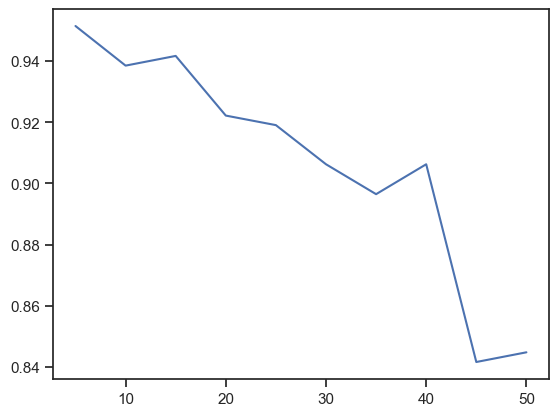

In [94]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Через RandomizedSearch

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

CPU times: user 394 ms, sys: 15 ms, total: 409 ms
Wall time: 533 ms


/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [97]:
clf_rs.best_score_, clf_rs.best_params_

(0.951507139079852, {'n_neighbors': 5})

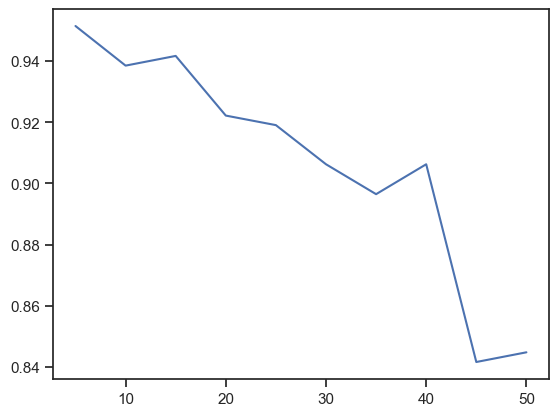

In [98]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## Построение оптимальной модели

Оптимальное число ближайших соседей = 5. Построим оптимальную модель:

In [100]:
clf_o = KNeighborsClassifier(n_neighbors=5)
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(104,
 array([1, 3, 3, 2, 5, 1, 1, 2, 5, 1, 0, 4, 1, 5, 2, 5, 2, 5, 1, 3, 2, 2,
        3, 3, 3, 3, 5, 0, 2, 2, 3, 3, 5, 3, 2, 3, 3, 3, 4, 3, 2, 3, 1, 2,
        2, 3, 3, 2, 2, 4, 0, 2, 2, 2, 2, 3, 2, 0, 2, 0, 3, 1, 1, 4, 1, 3,
        3, 1, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 5, 2, 0, 3, 3, 5, 0, 2, 3,
        1, 0, 2, 5, 3, 2, 3, 3, 3, 1, 1, 3, 0, 5, 2, 2]))

## Оценка качества исходной и оптимальной модели

### Метрика "Матрица ошибок"

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [108]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [110]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_y_train))[:10]

[(5, 0),
 (2, 1),
 (5, 0),
 (2, 1),
 (2, 1),
 (1, 0),
 (5, 0),
 (2, 1),
 (4, 0),
 (3, 0)]

In [111]:
bin_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_test, bin_y_test))[:10]

[(4, 0),
 (3, 0),
 (3, 0),
 (2, 1),
 (4, 0),
 (1, 0),
 (1, 0),
 (2, 1),
 (5, 0),
 (1, 0)]

In [144]:
# Конвертация предсказанных признаков
bin_target_i = convert_target_to_binary(target_i, 2)
bin_target_o = convert_target_to_binary(target_o, 2)

In [116]:
confusion_matrix(bin_y_test, bin_target1_1, labels=[0, 1])

array([[71,  0],
       [ 0, 33]])

In [117]:
tn, fp, fn, tp = confusion_matrix(bin_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(71, 0, 0, 33)

In [119]:
# Пример для небинарной классификации
confusion_matrix(y_test, target1_1, labels=[0, 1, 2,3,4,5])

array([[10,  0,  0,  0,  0,  0],
       [ 1, 13,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 10]])

In [121]:
from sklearn.metrics import plot_confusion_matrix

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


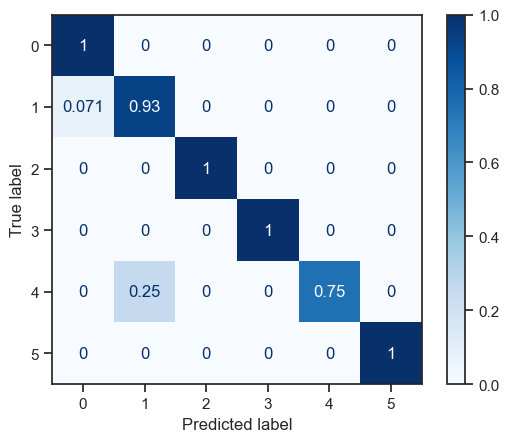

In [127]:
ConfusionMatrixDisplay.from_estimator(
        clf_i,
        X_test,
        y_test,
        display_labels=clf_i.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

In [128]:
confusion_matrix(y_test, target_o, labels=[0, 1, 2, 3, 4, 5])

array([[10,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  0,  4,  2],
       [ 0,  0,  0,  1,  0,  9]])

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


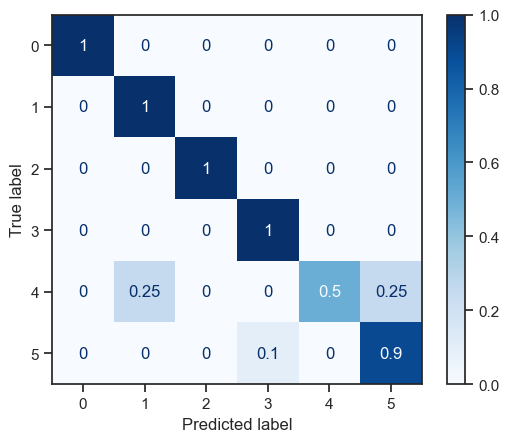

In [129]:
ConfusionMatrixDisplay.from_estimator(
        clf_o,
        X_test,
        y_test,
        display_labels=clf_o.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

У исходной модели точность выше чем у оптимальной

In [137]:
bin_clf_i = KNeighborsClassifier(n_neighbors=20)
bin_clf_i.fit(X_train, bin_y_train)
bin_clf_i.predict(X_test)

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [138]:
proba_target_i = bin_clf_i.predict_proba(X_test)
len(proba_target_i), proba_target_i

(104,
 array([[1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.55, 0.45],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.85, 0.15],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.75, 0.25],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
    

In [139]:
true_proba_target_i = proba_target_i[:,1]
true_proba_target_i

array([0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.45, 0.  , 0.  , 0.15,
       0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  ,
       1.  , 0.  , 0.  , 0.75, 0.55, 0.  , 0.35, 1.  , 1.  , 1.  , 1.  ,
       0.  , 0.45, 0.15, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.25, 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  ,
       1.  , 0.  , 0.  , 1.  , 0.3 , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 0.05, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.1 , 0.  , 1.  , 1.  ])

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

In [141]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

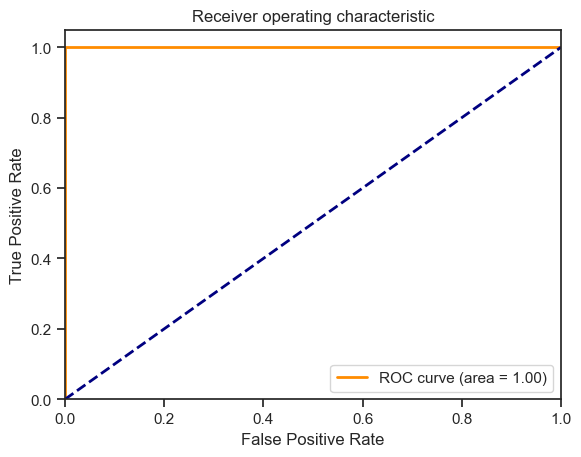

In [145]:
draw_roc_curve(bin_y_test, bin_target_i, pos_label=1, average='micro')

In [146]:
bin_clf_o = KNeighborsClassifier(n_neighbors=5)
bin_clf_o.fit(X_train, bin_y_train)
bin_clf_o.predict(X_test)

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [147]:
proba_target_o = bin_clf_o.predict_proba(X_test)
len(proba_target_o), proba_target_o

(104,
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [0.2, 0.8],
        [1. , 

In [148]:
true_proba_target_o = proba_target_o[:,1]
true_proba_target_o

array([0. , 0. , 0. , 1. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 1. , 1. , 0. , 0. , 1. , 0.8, 0. , 0. , 1. ,
       1. , 1. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.2, 1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ])

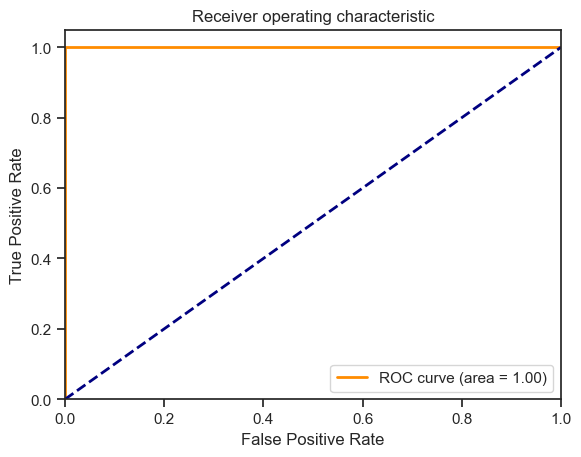

In [149]:
draw_roc_curve(bin_y_test, bin_target_o, pos_label=1, average='micro')

Точность у оптимальной и исходной модели одинаковая